In [296]:
#Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [297]:
#Load Dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/gmbt18/CS176-Project/cedric-preproc/Exasens.csv')

In [298]:
#Removing unnecessary rows and cols
dataset.drop(dataset.columns[[9,10,11,12]],axis=1,inplace=True)
# dataset.drop(dataset.columns[[1,2,3,4,5]],axis=1,inplace=True)
dataset.drop([0,1],axis=0,inplace=True)

# dataset.drop(dataset[dataset['Diagnosis'] == 'Infected'].index,axis=0,inplace=True)
# dataset.drop(dataset[dataset['Diagnosis'] == 'Asthma'].index,axis=0,inplace=True)

#Replace values
dataset.replace('HC',0,inplace=True)
dataset.replace('COPD',1,inplace=True)
dataset.replace('Asthma',2,inplace=True)
dataset.replace('Infected',3,inplace=True)

# Group Ages
# dataset['Age'] = dataset['Age'].mask(dataset['Age']<40,1)
# dataset['Age'] = dataset['Age'].mask((dataset['Age']>=40) & (dataset['Age']<60),2)
# dataset['Age'] = dataset['Age'].mask(dataset['Age']>=60,3)

#Renaming cols
dataset.columns.values[2] = "Img Min"
dataset.columns.values[3] = "Img Avg"
dataset.columns.values[4] = "Real Min"
dataset.columns.values[5] = "Real Avg"

#Rearranging Cols
# dataset = dataset[['Gender','Age','Smoking','Diagnosis']]

#Rearranging Rows
dataset.sort_values(by=['Diagnosis'], inplace=True)
dataset = dataset.reset_index()
del dataset['index']

In [299]:
# Impute missing using means
# dataset['Img Min'].fillna(pd.to_numeric(dataset['Img Min'], errors='coerce').mean(),inplace=True)
# dataset['Img Avg'].fillna(pd.to_numeric(dataset['Img Avg'], errors='coerce').mean(),inplace=True)
# dataset['Real Min'].fillna(pd.to_numeric(dataset['Real Min'], errors='coerce').mean(),inplace=True)
# dataset['Real Avg'].fillna(pd.to_numeric(dataset['Real Avg'], errors='coerce').mean(),inplace=True)

In [300]:
print(dataset)

     Diagnosis    ID  Img Min       Img Avg Real Min      Real Avg  Gender  \
0            0   121      NaN           NaN      NaN           NaN     0.0   
1            0    24      NaN           NaN      NaN           NaN     0.0   
2            0    25      NaN           NaN      NaN           NaN     0.0   
3            0  26-3  -327.78  -318.5670948  -507.23  -469.5871885     1.0   
4            0    27      NaN           NaN      NaN           NaN     1.0   
..         ...   ...      ...           ...      ...           ...     ...   
394          3  I123      NaN           NaN      NaN           NaN     0.0   
395          3  I122      NaN           NaN      NaN           NaN     0.0   
396          3  I121      NaN           NaN      NaN           NaN     0.0   
397          3  I139      NaN           NaN      NaN           NaN     0.0   
398          3  I180      NaN           NaN      NaN           NaN     0.0   

      Age  Smoking  
0    75.0      1.0  
1    18.0      1.0  


In [301]:
# CHOOSE WHICH COLUMNS TO USE (based on dataset)
# 6 = Gender, 7 = Age, 8 = Smoking
x = dataset.iloc[:, [7,8]]
x = np.array(x)

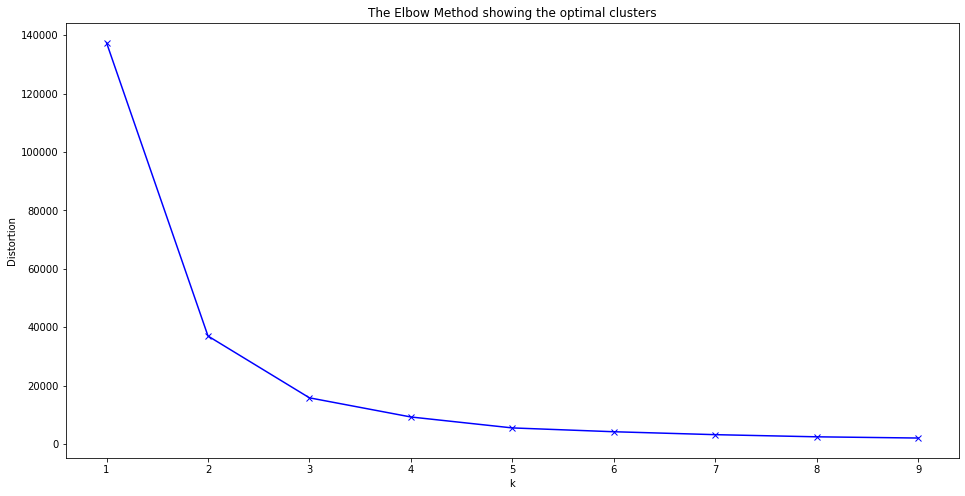

In [302]:
# Finding K
# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(x)
  distortions.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

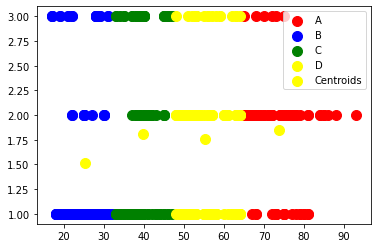

In [303]:
# Best K is K=4

# Define the model
kmeans_model = KMeans(n_clusters=4, random_state=1)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'A')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'B')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'C')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 100, c = 'yellow', label = 'D')

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()